#  Version with SQL Db

In [1]:
import sqlite3 as sq
import pandas as pd
import numpy as np
import csv

In [2]:
conn = sq.connect('E:\BootCamp\Brief1\Db\Brief1.db')

In [3]:
df_artistes = pd.read_sql_query ('SELECT * FROM "artistes"',conn)

In [4]:
df_chansons = pd.read_sql_query ('SELECT * FROM "chansons"',conn)

In [5]:
conn.close()

In [6]:
df_artistes.info()
df_chansons.info()
df_chansons.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1104349 entries, 0 to 1104348
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1104349 non-null  object 
 1   followers   1104336 non-null  float64
 2   genres      1104349 non-null  object 
 3   name        1104349 non-null  object 
 4   popularity  1104349 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 42.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [7]:
df_artistes.describe()

,followers,popularity
count,1.104336e+06,1.104349e+06
mean,1.074304e+04,9.083884e+00
std,2.609554e+05,1.376310e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.900000e+01,2.000000e+00
75%,4.510000e+02,1.400000e+01
max,7.890023e+07,1.000000e+02


# Exploration

In [8]:
df_chansons["artists"].value_counts()

['Die drei ???']                                               3856
['TKKG Retro-Archiv']                                          2006
['Benjamin Blümchen']                                          1503
['Bibi Blocksberg']                                            1472
['Lata Mangeshkar']                                            1373
                                                               ... 
['Snoop Dogg', 'Warren G', 'Nate Dogg', 'Mauseburg']              1
['Velet', 'Dilan']                                                1
['Omar Pene', 'Super Diamono']                                    1
['Svika Pick', 'Margalit Ankori', "Participants of 'Hair'"]       1
['B.G.K.']                                                        1
Name: artists, Length: 114030, dtype: int64

In [9]:
df_chansons.name.nunique()

446474

In [10]:
df_chansons.id_artists.nunique()

115062

In [11]:
df_artistes.name.nunique()

1078660

In [13]:
print(df_chansons['duration_ms'].min())
print(df_chansons['duration_ms'].max())

3344
5621218


# Check missing data

In [14]:
list1_null = df_artistes[df_artistes.isnull().values.any(axis=1)]

In [15]:
list2_null = df_chansons[df_chansons.isnull().values.any(axis=1)]

In [16]:
index1_null = df_artistes.index[df_artistes.isnull().any(axis=1)]
index2_null = df_chansons.index[df_chansons.isnull().any(axis=1)]
df_artistes.drop(labels=index1_null, inplace=True)
df_chansons.drop(labels=index2_null, inplace=True)

# Cleansing

In [17]:
#df_chansons["id_artists"] = df_chansons["id_artists"].str.replace("['", "")
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace("['", ''))
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace('["', ''))
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace("']", ''))
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace('"]', ''))
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace("'", ''))
df_chansons["id_artists"] = df_chansons["id_artists"].str.replace('"', ''))

In [18]:
df_chansons["artists"] = df_chansons["artists"].str.replace("['", ''))
df_chansons["artists"] = df_chansons["artists"].str.replace('["', ''))
df_chansons["artists"] = df_chansons["artists"].str.replace("']", ''))
df_chansons["artists"] = df_chansons["artists"].str.replace('"]', ''))
df_chansons["artists"] = df_chansons["artists"].str.replace("'", ''))
df_chansons["artists"] = df_chansons["artists"].str.replace('"', ''))

###### Drop duplicated songs with similar attributes

In [19]:
store = df_chansons.drop_duplicates(subset=['name', 'duration_ms','id_artists'])

###### First selection of "real" songs after first "offline" data exploration

In [20]:
long_song = 400000
short_song = 150000

real_subset=store[(store['duration_ms'] <= long_song) & (store['duration_ms'] >= short_song)]

# Plotting

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [22]:
songs = real_subset.drop(columns=['id', 'name', 'artists', 'id_artists', 'release_date'], axis=1)
singers = df_artistes.drop(columns=['id', 'name','genres'], axis=1)

In [23]:
scaler = StandardScaler()
scaled_songs = pd.DataFrame(scaler.fit_transform(songs), columns=songs.columns)
scaled_singers = pd.DataFrame(scaler.fit_transform(singers), columns=singers.columns)

In [24]:
pd.set_option('precision', 2)
scaled_songs.corr()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.00e+00,9.02e-02,2.09e-01,0.20,0.30,1.70e-02,3.29e-01,-3.00e-02,-1.16e-02,-3.72e-01,-2.28e-01,-4.37e-02,-2.07e-03,6.53e-02,9.26e-02
duration_ms,9.02e-02,1.00e+00,-3.07e-02,-0.07,0.08,5.31e-03,5.08e-03,-4.39e-02,-2.57e-02,-1.48e-01,1.21e-02,2.38e-02,-1.71e-01,-3.33e-03,3.37e-02
explicit,2.09e-01,-3.07e-02,1.00e+00,0.16,0.12,1.16e-02,1.30e-01,-5.33e-02,2.35e-01,-1.41e-01,-6.33e-02,-5.80e-03,-1.76e-02,-3.41e-03,4.37e-02
danceability,1.96e-01,-7.45e-02,1.59e-01,1.00,0.26,2.22e-02,2.57e-01,-5.34e-02,1.74e-01,-2.58e-01,-1.82e-01,-1.27e-01,5.29e-01,-5.19e-02,1.75e-01
energy,3.04e-01,7.95e-02,1.17e-01,0.26,1.00,3.44e-02,7.64e-01,-6.45e-02,3.53e-02,-7.17e-01,-2.01e-01,1.31e-01,3.95e-01,2.16e-01,1.96e-01
key,1.70e-02,5.31e-03,1.16e-02,0.02,0.03,1.00e+00,2.64e-02,-1.24e-01,1.06e-02,-2.53e-02,-7.57e-03,-5.60e-03,2.32e-02,4.17e-03,8.64e-03
loudness,3.29e-01,5.08e-03,1.30e-01,0.26,0.76,2.64e-02,1.00e+00,-4.20e-02,-3.27e-02,-5.11e-01,-3.27e-01,5.68e-02,2.64e-01,1.63e-01,1.47e-01
mode,-3.00e-02,-4.39e-02,-5.33e-02,-0.05,-0.06,-1.24e-01,-4.20e-02,1.00e+00,-3.63e-02,5.33e-02,-7.69e-03,1.07e-02,1.30e-03,8.95e-03,-1.66e-02
speechiness,-1.16e-02,-2.57e-02,2.35e-01,0.17,0.04,1.06e-02,-3.27e-02,-3.63e-02,1.00e+00,-2.46e-03,-5.83e-02,1.04e-01,6.18e-02,1.64e-03,-2.75e-02
acousticness,-3.72e-01,-1.48e-01,-1.41e-01,-0.26,-0.72,-2.53e-02,-5.11e-01,5.33e-02,-2.46e-03,1.00e+00,2.17e-01,-1.75e-02,-2.01e-01,-1.78e-01,-1.83e-01


<AxesSubplot:>

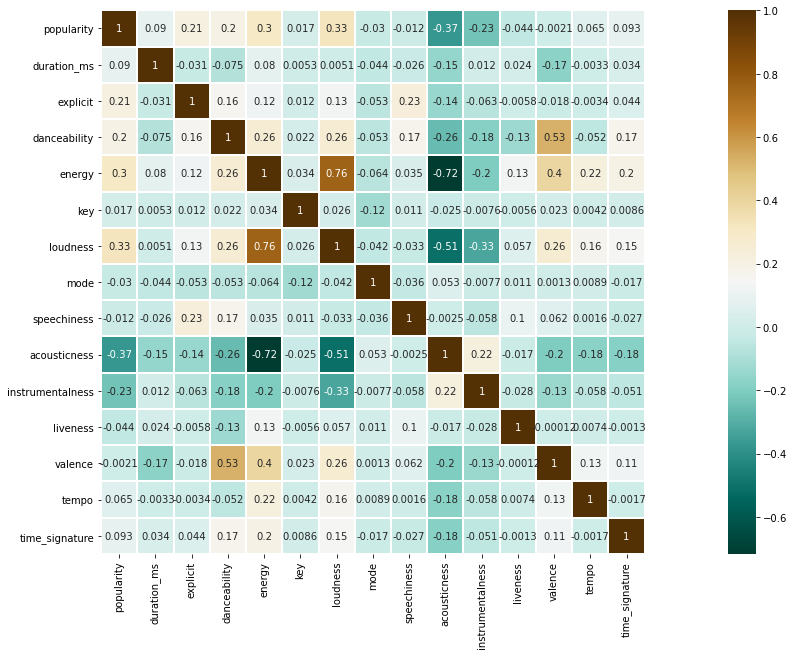

In [25]:
plt.subplots(figsize=(30,10))
sns.heatmap(scaled_songs.corr(), annot = True, cbar = True, cmap = 'BrBG_r', square=True, linewidth=1)

<AxesSubplot:xlabel='energy', ylabel='loudness'>

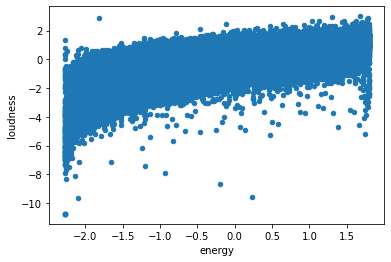

In [26]:
scaled_songs.plot(kind = 'scatter', x = 'energy', y = 'loudness')

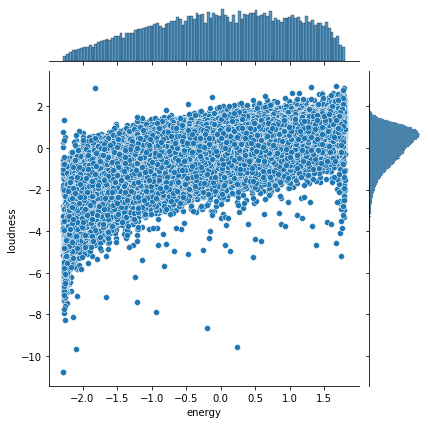

In [27]:
sns.jointplot(x='energy', y='loudness', data = scaled_songs)
plt.show()

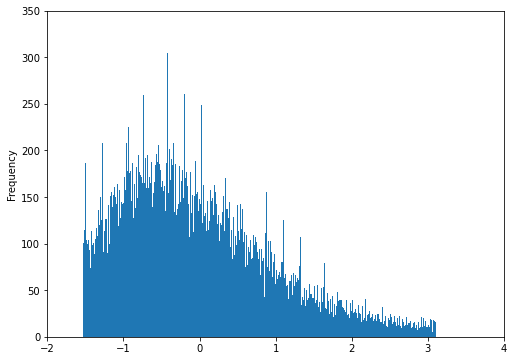

In [60]:
fig = plt.figure(figsize=(18,6))
echelle = fig.add_subplot(1,2,1)
#plt.hist(scaled_songs['duration_ms'], bins=4050)
scaled_songs["duration_ms"].plot(kind = 'hist',bins=5000)
echelle.set_xlim([-2,4])
echelle.set_ylim([0,350])
plt.show()

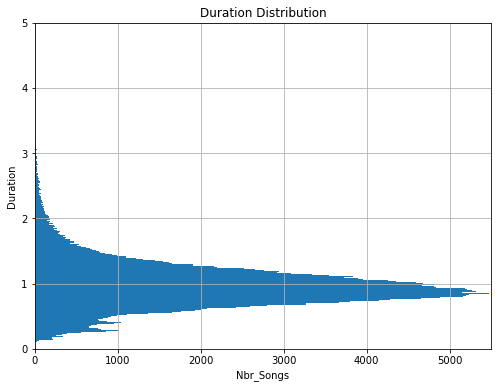

In [58]:
fig = plt.figure(figsize=(18,6))
echelle = fig.add_subplot(1,2,1)
echelle.set_xlim([0,5500])
echelle.set_ylim([0,5])

plt.hist(df_chansons["duration_ms"]/(df_chansons["duration_ms"].mean()),bins=4000,orientation='horizontal')
plt.title('Duration Distribution')
plt.xlabel('Nbr_Songs')
plt.ylabel('Duration')
plt.grid()
plt.show()

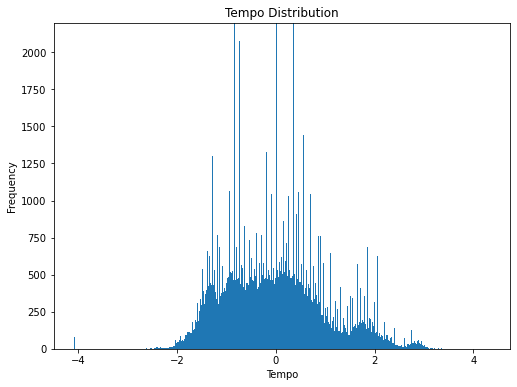

In [28]:
fig = plt.figure(figsize=(18,6))
echelle = fig.add_subplot(1,2,1)
scaled_songs["tempo"].plot(kind = 'hist',bins=2000)
#echelle.set_xlim([0,1e6])
echelle.set_ylim([0,2200])
plt.title('Tempo Distribution')
plt.ylabel('Frequency')
plt.xlabel('Tempo')
plt.show()

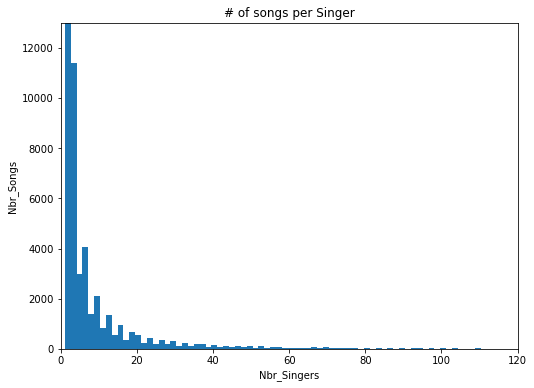

In [32]:
Songs_artist = df_chansons.value_counts(subset=['id_artists']).reset_index(name="count")
fig = plt.figure(figsize=(18,6))
echelle = fig.add_subplot(1,2,1)
Songs_artist["count"].plot(kind = 'hist',bins=2500)
echelle.set_xlim([0,120])
echelle.set_ylim([0,13000])
plt.title('# of songs per Singer')
plt.xlabel('Nbr_Singers')
plt.ylabel('Nbr_Songs')
plt.show()

# Moustache

<AxesSubplot:>

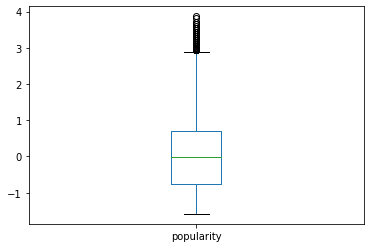

In [34]:
scaled_songs.boxplot(column =['popularity'], grid = False) 

<AxesSubplot:>

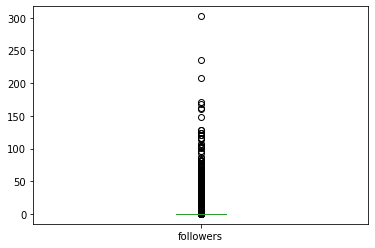

In [35]:
scaled_singers.boxplot(column =['followers'], grid = False) 

# Merging

In [36]:
real_subset

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.43,0.18,1,-21.18,1,0.05,0.99,2.18e-02,0.21,0.46,130.42,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.32,0.09,7,-27.96,1,0.05,0.99,9.18e-01,0.10,0.40,169.98,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.40,0.16,3,-16.90,0,0.04,0.99,1.30e-01,0.31,0.20,103.22,4
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.23,0.26,5,-12.34,1,0.04,0.99,2.47e-01,0.10,0.05,118.89,4
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,Mistinguett,4AxgXfD7ISvJSTObqm4aIE,1922,0.56,0.18,4,-13.76,1,0.05,0.99,1.55e-05,0.33,0.65,133.09,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586665,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,Gregory Oberle,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.56,0.03,1,-25.55,1,0.10,1.00,9.61e-01,0.11,0.39,63.70,3
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,阿YueYue,1QLBXKM5GCpyQQSVMNZqrZ,2020-09-26,0.56,0.52,0,-7.47,0,0.03,0.79,0.00e+00,0.06,0.21,131.90,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,ROLE MODEL,1dy5WNgIKQU6ezkpZs4y8z,2020-10-21,0.77,0.66,0,-5.22,1,0.07,0.14,2.97e-04,0.09,0.69,150.09,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,FINNEAS,37M5pPGs6V1fchFJSgCguX,2020-09-02,0.54,0.31,7,-12.82,0,0.04,0.90,1.50e-04,0.09,0.07,145.09,4


In [37]:
input = pd.merge(real_subset, df_artistes[['id', 'name', 'popularity','followers']], 
                 left_on="id_artists", right_on="id", how="left")

In [38]:
input_noNA = input.dropna()

In [39]:
input_noNA.value_counts(subset=['id_artists']).reset_index(name="count")

,id_artists,count
0,61JrslREXq98hurYL2hYoc,1070
1,2maQMqxNnlRrBrS1oAsrX9,845
2,5V0MlUE1Bft0mbLlND7FJz,731
3,0gXDpqwYNDODn7fB0RDN8J,564
4,1Mxqyy3pSjf8kZZL4QVxS0,539
...,...,...
50995,57l2t5t0sKKuIrTQhoSPpg,1
50996,37fG1EQuwb6zBHyFYUGfj8,1
50997,57iZ4HvaVKP7d3RxScmquK,1
50998,57hIq5FJN5AnhahUz2fLCt,1


# Learning

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neural_network import MLPClassifier
#from sklearn.svm import SVC
from sklearn.metrics import r2_score

In [41]:
XX=input_noNA.drop(columns=['popularity_x', 'id_x', 'name_x', 'artists', 
                           'id_artists', 'release_date','id_y', 'name_y'], axis=1)

# By-pass use to solve issue with Scaler step
ybypass = pd.DataFrame(input_noNA.iloc[:, 2:4].values)

In [42]:
scaler = StandardScaler()
XX = pd.DataFrame(scaler.fit_transform(XX), columns=XX.columns)

y1 = pd.DataFrame(scaler.fit_transform(ybypass), columns=ybypass.columns)
yy = y1.iloc[:, 0].values

In [43]:
XX_train, XX_test, yy_train, yy_test = train_test_split(XX, yy, test_size=0.2, random_state=0)

In [44]:
regressor = LinearRegression(fit_intercept=True)
regressor.fit(XX_train, yy_train)

LinearRegression()

In [45]:
yy_pred=regressor.predict(XX_test)

In [46]:
r2_score(yy_test, yy_pred)

0.438945418106224

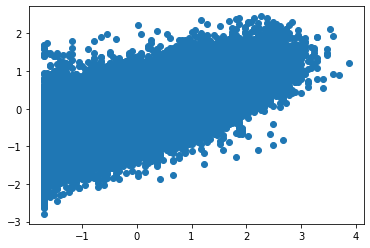

In [47]:
plt.scatter(yy_test, yy_pred)
plt.show()

In [49]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(yy_test, yy_pred)
MSE

0.5591033377425364

In [50]:
RMSE = mean_squared_error(yy_test, yy_pred, squared=False)
RMSE

0.7477321296711386

In [52]:
print('R2:', regressor.score(XX_test, yy_test))
print('intercept:', regressor.intercept_)
print('slope:', regressor.coef_)

R2: 0.438945418106224
intercept: 0.00020247083051999604
slope: [ 0.02630671  0.06244717  0.14315745 -0.00278663  0.0061908   0.13783125
 -0.00347221 -0.01128203 -0.14111794 -0.04836956 -0.05050598 -0.13059832
  0.0279303   0.00265484  0.50570386  0.00898684]


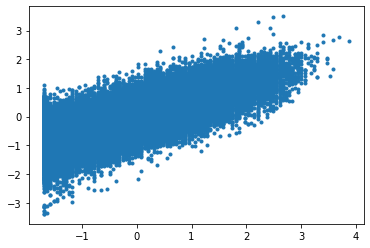

In [54]:
plt.plot(yy_test, yy_test - yy_pred,'.')
plt.show()